# Основы визуализации данных с помощью Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык визуализации данных с помощью простых графиков matplotlib. Научиться использовать визуализацию данных для проверки гипотез и валидации данных.

### Описание домашнего задания и формат сдачи

Вам предстоит выполнить задачи по визуализации данных. Для этого  впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку преподавателю.

**Важно учесть:** У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` – порядковый номер записи в датасете
* `Name` – наименование игры
* `Platform` – платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` – год выпуска игры
* `Genre` – жанр игры
* `Publisher` – наименование компании-издателя игры
* `NA_Sales` – объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` – объем продаж игры в Европе, млн. копий
* `JP_Sales` – объем продаж игры в Японии, млн. копий
* `Other_Sales` – объем продаж игры в остальных странах, млн. копий
* `Global_Sales` – объем продаж игры по всему миру, млн. копий

### Критерии оценки

**Зачет** – выполнены задачи 1-9, каждый график отформатирован и читаем

**На доработку** – выполнены не все обязательные задачи или какой-либо из графиков не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, необходимые для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

### Загрузка данных

In [116]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии.

([<matplotlib.axis.XTick at 0x145bcd30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

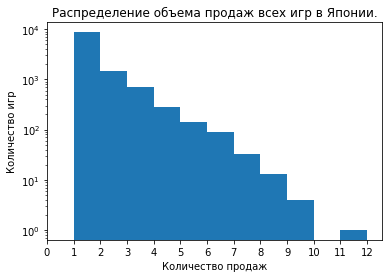

In [132]:
serie = df.groupby('Name').count()['JP_Sales']

plt.hist(serie, bins=11, log='True')
plt.title("Распределение объема продаж всех игр в Японии.")
plt.xlabel('Количество продаж')
plt.ylabel('Количество игр')

bin_width = 1
x_range = [i * bin_width for i in range(serie.max()+1)]

# x_range = [i for i in range(1, serie.max()+1)]
plt.xticks(x_range)

### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах.

In [170]:
df.groupby('Name').count()['JP_Sales']

Name
'98 Koshien                                1
.hack//G.U. Vol.1//Rebirth                 1
.hack//G.U. Vol.2//Reminisce               1
.hack//G.U. Vol.2//Reminisce (jp sales)    1
.hack//G.U. Vol.3//Redemption              1
                                          ..
thinkSMART: Chess for Kids                 1
uDraw Studio                               1
uDraw Studio: Instant Artist               2
wwe Smackdown vs. Raw 2006                 1
¡Shin Chan Flipa en colores!               1
Name: JP_Sales, Length: 11493, dtype: int64

Text(0, 0.5, 'Количество продаж')

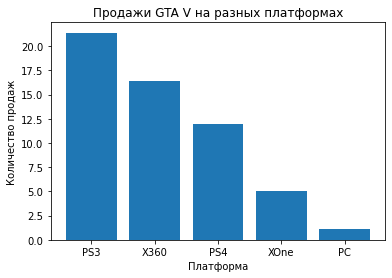

In [119]:
plt.bar(df[df['Name'] == 'Grand Theft Auto V']['Platform'], df[df['Name'] == 'Grand Theft Auto V']['Global_Sales'])

plt.title("Продажи GTA V на разных платформах")
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')

### Задача 3

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам.

Text(0, 0.5, 'Продажи')

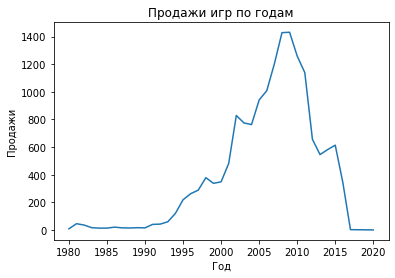

In [120]:
plt.plot(df.groupby('Year').count()['Global_Sales'])

plt.title('Продажи игр по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')

### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке.

Text(0.5, 1.0, 'Зависимость продаж в мире от продаж в Северной Америке')

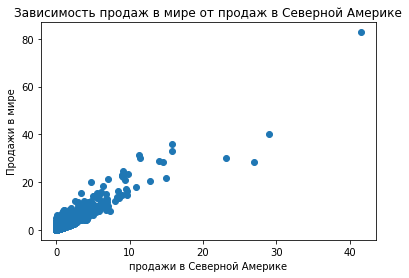

In [121]:
plt.scatter(df['NA_Sales'], df['Global_Sales'])
plt.ylabel('Продажи в мире')
plt.xlabel('продажи в Северной Америке')

plt.title('Зависимость продаж в мире от продаж в Северной Америке')

### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

Text(0.5, 1.0, 'Продажи "Super Mario Bros." на разных платформах')

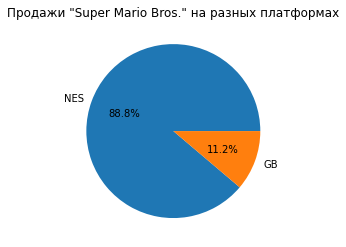

In [122]:
mario = df[df['Name'] == 'Super Mario Bros.'].set_index('Platform')['Global_Sales']
plt.pie(mario, labels=mario.index, autopct = '%0.1f%%')

plt.title('Продажи "Super Mario Bros." на разных платформах')

### Задача 6

Определите 5 издателей, имеющих наибольшие суммарные продажи во всём мире в 2013 году, и проиллюстрируйте величину их продаж на столбчатой диаграмме.

Text(0.5, 1.0, 'Крупнейшие мировые издатели')

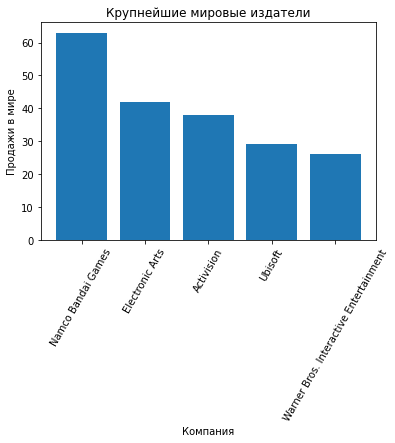

In [123]:
publishers = df[df['Year'] == 2013].groupby('Publisher').count()['Global_Sales'].sort_values(ascending=False).head(5)
plt.bar(publishers.index, publishers)
plt.xticks(rotation=60)

plt.ylabel('Продажи в мире')
plt.xlabel('Компания')

plt.title('Крупнейшие мировые издатели')

### Задача 7

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.

(array([1., 2., 3., 2., 1., 2., 0., 2., 1., 2.]),
 array([ 326. ,  433.3,  540.6,  647.9,  755.2,  862.5,  969.8, 1077.1,
        1184.4, 1291.7, 1399. ]),
 <BarContainer object of 10 artists>)

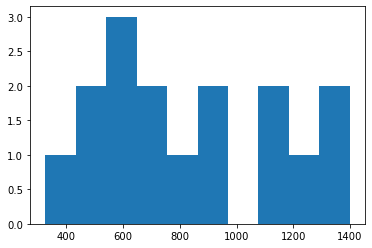

In [187]:
non_nintendo = df[(df['Year'] >= 2000) & (df['Year'] <= 2015) & (df['Publisher'] != 'Nintendo')]
non_nintendo = non_nintendo.groupby('Year').count()['Global_Sales']
plt.hist(non_nintendo)

### Задача 8

Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам.

Text(0.5, 1.0, 'Мировые продажи игр жанра Action')

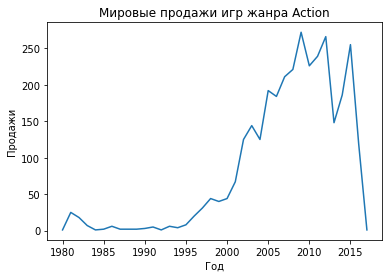

In [306]:
plt.plot(df[df['Genre'] == 'Action'].groupby('Year').count()['Global_Sales'])

plt.ylabel('Продажи')
plt.xlabel('Год')

plt.title('Мировые продажи игр жанра Action')

### Задача 9

С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра. Столбцы расположите по убыванию.

Text(0.5, 1.0, 'Продажи Microsoft Game Studios в Северной Америке')

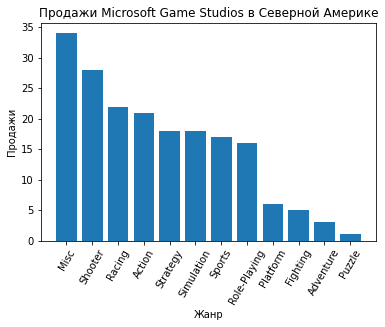

In [308]:
genres = df[df['Publisher'] == 'Microsoft Game Studios'].groupby('Genre').count()['NA_Sales'].sort_values(ascending=False)
plt.bar(genres.index, genres)
plt.xticks(rotation=60)

plt.ylabel('Продажи')
plt.xlabel('Жанр')

plt.title('Продажи Microsoft Game Studios в Северной Америке')

## Дополнительные (необязательные) задачи

### Задача 10

Одной из основных задач при анализе данных является проверка данных на корректность и отсутствие ошибок. В датасете "vgsales" одним из потенциальных источников ошибок является столбец с общемировыми продажами. По идее, значение общемировых продаж какой-либо игры должно равняться сумме продаж в Северной Америке, Европе, Японии и остальных странах, в противном случае мы получим ошибку в данных, которая может негативно повлиять на весь дальнейший процесс анализа.

Причин возникновения такой ошибки может быть несколько. Давайте рассмотрим следующие причины:
1. Ошибка округления. В целом, такая ошибка достаточно часто встречается при переводе величин из одних единиц в другие (например, из тысяч копий в миллионы копий).
1. Ошибка вычислений. Такая ситуация требует более серьезного исследования, поскольку она может привести к недостоверным результатам анализа данных.

Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.

С помощью круговой диаграммы проиллюстрируйте процент записей в датасете, имеющих такую ошибку суммирования продаж.

In [ ]:
### YOUR CODE HERE ###
